# **Retrieval augmented Genaration**

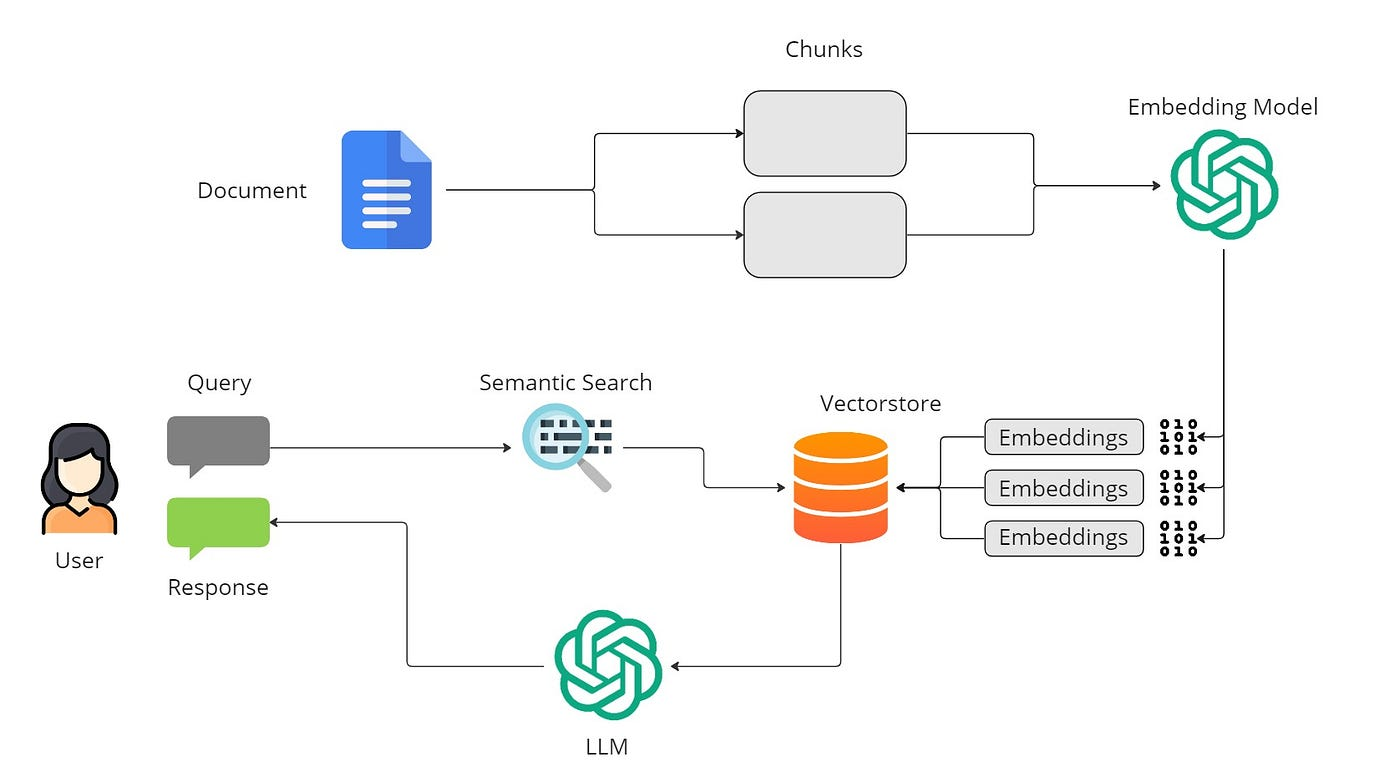

## 01. Embedding Model
## 02. Vector store or Db
## 03. LLM

## **Embedding Model**

1.

**LangChain is a framework for building LLM-powered applications that can reason, remember, and interact with data. It provides modular components and high-level chains for building RAG, agents, chatbots, and tools**

| Component            | Purpose                                   |
| -------------------- | ----------------------------------------- |
| **Document Loaders** | Load data from PDF, CSV, webpages, etc.   |
| **Text Splitters**   | Break content into chunks                 |
| **Embeddings**       | Convert text into vector embeddings       |
| **VectorStores**     | Store/retrieve similar chunks             |
| **LLMs**             | Use GPT, FLAN, LLaMA, etc.                |
| **Chains**           | Combine steps: input → retrieval → output |
| **Agents**           | Tool-using LLMs with reasoning            |


PDF → Text → Chunks → Embeddings → Vector Store


In [ ]:
!pip install pdfminer.six
!pip install langchain openai faiss-cpu sentence-transformers
!pip install -U langchain_community
!pip install -U sentence-transformers
!pip install pypdf
!pip install pymupdf



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 47.2 MB/s eta 0:00:00


# PDF LOADING

### Loading pdf with PDF-Miner

In [ ]:
from pdfminer.high_level import extract_text

# def extract_text_pdfminer(pdf_path):
#     return extract_text(pdf_path)

# text = extract_text_pdfminer("/content/clinical_medicine_ashok_chandra.pdf")
# print(text)

print(extract_text("/content/clinical_medicine_ashok_chandra.pdf"))

S
CLINICAL
I
S
MEDICINE
O
N
G
A SYSTEM OF DIA  
A
IN OUTLINE
I
D

 NOSIS

Prof. Ashok Chandra
MD, MRCP (UK), FRCP, FICP, FIACM 
Former Professor & Head of Medicine 
King George's Medical University 
Professor & Head of Medicine 
Emeritus Professor of Medicine 
Era's Lucknow Medical College 
Lucknow, India

e
t
i
S

n
o
i
t
a
n
i
m
a
x
E

y
g
o
l
o
i
t
E

m
a
x
E
l
a
r
e
n
e
G

y
r
o
t
s
i

H

y
g
o
l
o
i
s
y
h
p
o
h
t
a
P

d
e
v
l
o
v
n
I

m
e
t
s
y
S

n
o
i
t
c
n
u
f
s
y
D

s

m
e
t
s
y
S

r
e
h
t
O

s
n
o
i
t
a
g
i
t
s
e
v
n
I

 
 
 
 
 
CONTENTS

1. Dedication

2.

Introduction

3. The Common Plan - an outline

4. Cardiology

5. Respiratory System

6. Neurology

7. Hepatobiliary Disease

8. Renal Disease

9. Endocrinal, Hematologym, Metabolic & Psychiatric Diseases 

10. Summation

11. Epilogue

Page

01

02

04

09

16

24

32

38

44

45

46

12. CV of  Dr. Ashok Chandra

Inner Back Cover

Dr. Ashok Chandra Contact Details

For 

th

 book email

profchandraashok@gmail.com
a fre

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 73.7 MB/s eta 0:00:00


### Loding PDf with PYMUPDF

In [ ]:
import fitz  # PyMuPDF

def extract_text_pymupdf(pdf_path):
    doc = fitz.open(pdf_path)
    all_text = ""
    for page in doc:
        all_text += page.get_text()
    return all_text

text = extract_text_pymupdf("/content/clinical_medicine_ashok_chandra.pdf")
print(text)  # Print first 500 characters


 NOSIS
A SYSTEM OF DIA  
IN OUTLINE
Prof. Ashok Chandra
MD, MRCP (UK), FRCP, FICP, FIACM 
Former Professor & Head of Medicine 
King George's Medical University 
Professor & Head of Medicine 
Emeritus Professor of Medicine 
Era's Lucknow Medical College 
Lucknow, India
History
Examination
General Exam
System Involved
Other Systems
Investigations
Site
Etiology
Pathophysiology
Dysfunction
CLINICAL
MEDICINE
G
NOSIS
DIA  
Page
1.
Dedication
01
2.
Introduction
02
3.
The Common Plan - an outline
04
4.
Cardiology
09
5.
Respiratory System
16
6.
Neurology
24
7.
Hepatobiliary Disease
32
8.
Renal Disease
38
9.
Endocrinal, Hematologym, Metabolic & Psychiatric Diseases 
44
10. Summation
45
11. Epilogue
46
12. CV of  Dr. Ashok Chandra
Inner Back Cover
CONTENTS
Dr. Ashok Chandra Contact Details
For a free PDF copy of this book email: 
profchandraashok@gmail.com
anurag.sain.chandra@gmail.com
This book is free to be emailed, copied and further distributed 
for advancement of medical knowledge.  The auth

### Langchain PDf loader

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 69.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.9/438.9 kB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.65
    Uninstalling langchain-core-0.3.65:
      Successfully uninstalled langchain-core-0.3.65
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.25
    Uninstalling langchain-0.3.25:
      Successfully uninstalled langchain-0.3.25


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 304.6/304.6 kB 10.1 MB/s eta 0:00:00


In [ ]:
from langchain.document_loaders import PyPDFLoader

loader = PyPDFLoader("/content/clinical_medicine_ashok_chandra.pdf")
pages = loader.load()
pages

ModuleNotFoundError: Module langchain_community.document_loaders not found. Please install langchain-community to access this module. You can install it using `pip install -U langchain-community`

### Splitting

In [ ]:
from langchain.text_splitter import CharacterTextSplitter

text_splitter = CharacterTextSplitter(chunk_size=500, chunk_overlap=50)
chunks = text_splitter.split_documents(pages)


NameError: name 'pages' is not defined

In [ ]:
chunks

[Document(metadata={'producer': 'Corel PDF Engine Version 16.0.0.707', 'creator': 'CorelDRAW X6', 'creationdate': '2017-06-16T12:56:12+05:30', 'author': 'Prakash', 'moddate': '2018-05-04T17:18:10+01:00', 'title': 'Untitled-1', 'source': '/content/clinical_medicine_ashok_chandra.pdf', 'total_pages': 52, 'page': 0, 'page_label': '1'}, page_content="NOSISA SYSTEM OF DIA  \nIN OUTLINE\nProf. Ashok Chandra\nMD, MRCP (UK), FRCP, FICP, FIACM \nFormer Professor & Head of Medicine \nKing George's Medical University \nProfessor & Head of Medicine \nEmeritus Professor of Medicine \nEra's Lucknow Medical College \nLucknow, India\nHistory\nExamination\nGeneral Exam\nSystem Involved\nOther Systems\nInvestigations\nSite\nEtiology\nPathophysiology\nDysfunction\nCLINICAL\nMEDICINE\nG NOSISDIA"),
 Document(metadata={'producer': 'Corel PDF Engine Version 16.0.0.707', 'creator': 'CorelDRAW X6', 'creationdate': '2017-06-16T12:56:12+05:30', 'author': 'Prakash', 'moddate': '2018-05-04T17:18:10+01:00', 'title

### Embedding Cration

In [ ]:
from langchain.embeddings import HuggingFaceEmbeddings

embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")


/tmp/ipython-input-7-3745702769.py:3: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public mod

### Using Faiss

In [ ]:
from langchain.vectorstores import FAISS

vectorstore = FAISS.from_documents(chunks, embedding_model)
vectorstore.save_local("faiss_index/")


| VectorDB          | Description                                                  | Best For                           |
| ----------------- | ------------------------------------------------------------ | ---------------------------------- |
| **FAISS**         | Local, fast, lightweight (by Facebook AI)                    | Small/medium projects, offline use |
| **ChromaDB**      | Simple, open-source, easy to use                             | Local apps, prototyping            |
| **Pinecone**      | Cloud-based, scalable, low-latency search                    | Production-level SaaS apps         |
| **Weaviate**      | Semantic search + metadata filtering; supports hybrid search | Enterprises, knowledge graphs      |
| **Milvus**        | Handles billions of vectors; GPU/CPU options                 | Big data, enterprise scale         |
| **Qdrant**        | Rust-based, fast, also supports filtering and payloads       | High-performance RAG apps          |
| **Redis**         | Embedding search via Redis Vector module                     | Apps already using Redis           |
| **ElasticSearch** | Traditional search + vector search plugin                    | Hybrid search (text + vector)      |


In [ ]:
from sentence_transformers import SentenceTransformer
sentences = [" hi I am jyesh","Hi how r u!!!!!!!!!!!!!!!","This is an example sentence", "Each sentence is converted"]

model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2')
embeddings = model.encode(sentences)
print(embeddings)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

[[-0.07602388 -0.02974467  0.0695552  ...  0.05651198 -0.00585696
  -0.11159214]
 [-0.0433364  -0.00775338  0.04423169 ...  0.03082936 -0.03514464
   0.02048002]
 [ 0.06765692  0.06349595  0.04871314 ...  0.03807071  0.05996537
  -0.04222871]
 [ 0.0864386   0.10276264  0.00539455 ...  0.07028488  0.07493117
  -0.08417753]]


In [ ]:
print(embeddings)


[[-0.07602388 -0.02974467  0.0695552  ...  0.05651198 -0.00585696
  -0.11159214]
 [-0.0433364  -0.00775338  0.04423169 ...  0.03082936 -0.03514464
   0.02048002]
 [ 0.06765692  0.06349595  0.04871314 ...  0.03807071  0.05996537
  -0.04222871]
 [ 0.0864386   0.10276264  0.00539455 ...  0.07028488  0.07493117
  -0.08417753]]


In [ ]:
embeddings[1] #" hi I am jyesh"

array([-4.33363952e-02, -7.75338430e-03,  4.42316905e-02, -3.19930427e-02,
       -1.13080433e-02,  1.27672609e-02,  8.54341462e-02, -4.19863574e-02,
        4.87283384e-03,  4.42140624e-02, -5.82809709e-02, -3.45940292e-02,
        4.88308966e-02, -3.15551832e-02, -1.00535396e-02,  2.71283817e-02,
       -1.81542784e-02, -2.00128779e-02, -1.38203442e-01, -4.01310436e-02,
        4.86334078e-02, -2.30695065e-02, -2.34227255e-02,  3.44619900e-02,
       -7.07903057e-02, -5.58198653e-02, -2.79741222e-03,  1.07355760e-02,
       -3.06470040e-03, -2.70473547e-02,  4.95976722e-03,  2.59449221e-02,
        4.55150120e-02, -3.28401253e-02, -6.58982471e-02,  1.60259986e-03,
        2.03375984e-02, -6.84893727e-02, -2.56542638e-02,  3.30967084e-02,
       -4.13437299e-02,  2.75558867e-02,  5.34851216e-02,  1.52931148e-02,
        6.16848283e-02, -2.87339073e-02, -3.25219594e-02,  3.54457938e-04,
        7.70058706e-02,  3.80992610e-03, -1.08474530e-01,  2.56685074e-02,
        4.07868102e-02,  

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/final_med_data.csv")

In [ ]:
df

,instruction,input,output
0,"Act as an AI Doctor or AI Medical Assistant, p...","Hello doctor,I had mumps five months ago and a...",1) There is no need to worry about reinfection...
1,"Act as an AI Doctor or AI Medical Assistant, p...","Hello doctor,I am trying to conceive but my hu...",1) Cocaine use can affect fertility by causing...
2,"Act as an AI Doctor or AI Medical Assistant, p...","Hello doctor,I am currently on the Yaz contrac...",1) The brown discharge is due to the hormonal ...
3,"Act as an AI Doctor or AI Medical Assistant, p...","Hello doctor,My son aged 13 years has got his ...","Hi, welcome to Chat Doctor forum. I understan..."
4,"Act as an AI Doctor or AI Medical Assistant, p...","Hello doctor,I just got one side of my wisdom ...","Hi, Thanks for your query. It appears that yo..."
...,...,...,...
1072704,Question: Is this describing a (1) directly co...,In a large population of critically ill adults...,This is a conditionally causative relationship
1072705,Question: Is this describing a (1) directly co...,Service providers of programmes should focus o...,This is a directly correlative relationship
1072706,Question: Is this describing a (1) directly co...,Protease inhibitor (PI)-based regimens are adv...,This is a directly correlative relationship
1072707,Question: Is this describing a (1) directly co...,"In children with T1DM, there appears to be a n...",This is a conditionally causative relationship


In [ ]:
df.columns

Index(['instruction', 'input', 'output'], dtype='object')

# **Building a  ✅ RAG Project**

### Library Installations

In [ ]:
!pip install -U langchain_community


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.2/45.2 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.9 MB/s eta 0:00:00


In [ ]:
!pip install -q langchain chromadb sentence-transformers pypdf auto-gptq transformers accelerate


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 4.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.3/19.3 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 305.5/305.5 kB 25.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.5/23.5 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 21.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 78.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 68.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.7/55.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.5/118.5 kB 9.9 MB/s eta 0

In [ ]:
!pip install pdfminer.six
!pip install langchain openai faiss-cpu sentence-transformers
!pip install -U sentence-transformers
!pip install pypdf
!pip install pymupdf



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 64.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.3/31.3 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 470.2/470.2 kB 16.5 MB/s eta 0:00:00
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 4.1.0
    Uninstalling sentence-transformers-4.1.0:
      Successfully uninstalled sentence-transformers-4.1.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 63.2 MB/s eta 0:00:00


### **Requirements / Agenda of the project**

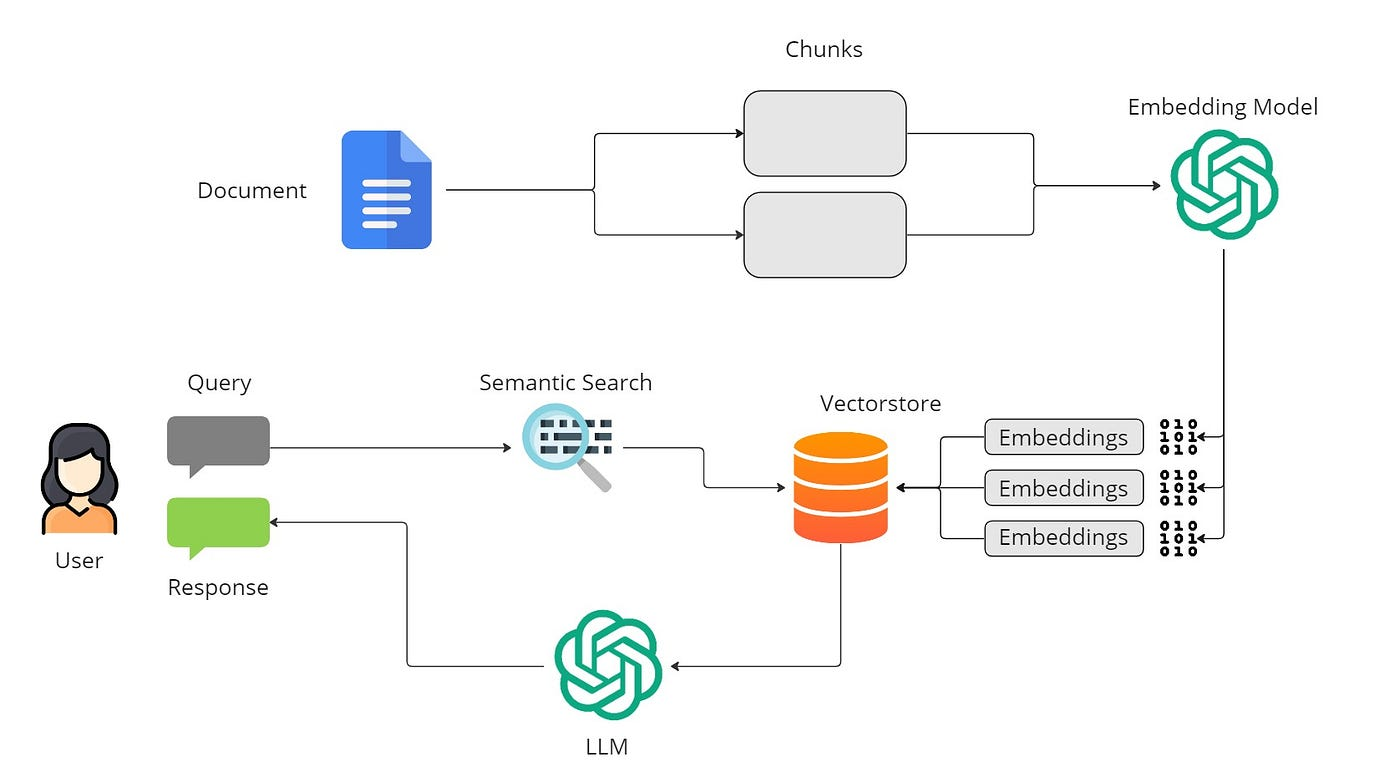

# GPT-Clone

# Medical AI bot :
# Finiance AI Bot :
# Insurace Bot :
# Travel AI Bot :

In [ ]:
# ✅ Step 0: Install Dependencies
!pip install -q transformers accelerate sentence-transformers langchain chromadb pypdf

# ✅ Step 1: Import Libraries
from google.colab import files
from langchain.document_loaders import PyPDFLoader
from langchain.text_splitter import CharacterTextSplitter
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import Chroma
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

# ✅ Step 2: Upload PDF File
#uploaded = files.upload()
pdf_path = "/content/clinical_medicine_ashok_chandra (1).pdf" #list(uploaded.keys())[0]

# ✅ Step 3: Load and Split the PDF
loader = PyPDFLoader(pdf_path)
documents = loader.load()

splitter = CharacterTextSplitter(chunk_size=500, chunk_overlap=50)
chunks = splitter.split_documents(documents)

# ✅ Step 4: Convert Chunks to Embeddings
embedding_model = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
vectorstore = Chroma.from_documents(chunks, embedding_model)
retriever = vectorstore.as_retriever(search_kwargs={"k": 10})

# ✅ Step 5: Load Qwen3 Model on GPU
model_id = "Qwen/Qwen3-0.6B"

tokenizer = AutoTokenizer.from_pretrained(model_id, trust_remote_code=True)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    trust_remote_code=True,
    device_map="auto",  # automatically uses GPU if available
    torch_dtype=torch.float16  # use fp16 for faster inference
)

# ✅ Step 6: Prompt Template
def build_prompt(context, question):
    return (
        '''You are a helpful AI assistant. Answer the user's question using ONLY the provided PDF content.
        You will get the Medical docum \n\n'''
        f"Context:\n{context}\n\n"
        f"Question: {question}\nAnswer:"
    )

# ✅ Step 7: Chat Loop
print("✅ Qwen3 PDF Chatbot is ready! Type 'exit' to stop.\n")

while True:
    user_input = input("👤 You: ")
    if user_input.lower() == "exit":
        print("👋 Chatbot session ended.")
        break

    # 1. Get relevant chunks
    docs = retriever.get_relevant_documents(user_input)
    context = "\n\n".join([doc.page_content for doc in docs])

    # 2. Create prompt
    prompt = build_prompt(context, user_input)

    # 3. Tokenize and generate
    inputs = tokenizer(prompt, return_tensors="pt").to(model.device)
    with torch.no_grad():
        outputs = model.generate(
            **inputs,
            max_new_tokens=128,
            temperature=0.7,
            do_sample=True,
            top_p=0.9
        )
    response = tokenizer.decode(outputs[0], skip_special_tokens=True)

    # 4. Strip prompt from output
    print("\n🤖 Qwen3:", response.replace(prompt, "").strip(), "\n")


ValueError: File path /content/clinical_medicine_ashok_chandra (1).pdf is not a valid file or url

 SPOT diagnosis: Pertains to advanced disease, skin diseases, endocrinal system involvement, some collagen disorders and many rare congenital disorders. 2.  Analyzing the main PRESENTING SYMPTOM 3.  Analyzing the main PHYSICAL SIGN 4.  Analyzing the SYNDROME - Symptom-sign complex 5.  Analyzing the presenting COMPLICATION of an underlying undiagnosed disease 6.  Investigations:  Routine,  Random,  Speciic,  Screening Programmes.
Answer: 1.  SPOT diagnosis: Pertains to advanced disease, skin diseases, endocrinal system involvement, some collagen disorders and many rare congenital disorders. 2.  Analyzing the main PRESENTING SYMPTOM 3.  Analyzing the main PHYSICAL SIGN 4.  Analyzing the SYNDROME - Symptom-sign complex 5.  Analyzing the presenting COMPLICATION of an underlying undiagnosed disease 6.  Investigations:  Routine,  Random,  Speciic,  Screening Programmes.


# **Vision Model : Qwen2.5VL**


#<font color="blue"><b>**ChatGPT-Clone Project**</b></font>



### Installations

In [ ]:
# ============================================================
# 📚 Qwen2‑VL‑2B‑Instruct ‑ multimodal chatbot (Colab notebook)
# ============================================================

# ------------------------------------------------------------
# 🔧 0. Install dependencies  (≈ 1‑2 min on Colab T4/V100) (required time)
# ------------------------------------------------------------
!pip -q install --upgrade \
    transformers accelerate sentencepiece safetensors \
    qwen-vl-utils \
    pillow \
    --no-cache-dir

# ⚡ (Optional) flash‑attention for faster multi‑image inference
# !pip -q install flash-attn --no-build-isolation

# Installations is needed (install before runnning the code..........)
# withouth clearifying depemdecies dont go to run....(samjha???)



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 108.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 117.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 182.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 153.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 253.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 192.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 160.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 155.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 198.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 173.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 91.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.3/35.3 MB 169.8 MB/s eta 0:00:00


### Library Importation

In [ ]:
# ------------------------------------------------------------
# 📥 1. Imports & helpers
# ------------------------------------------------------------
import torch, pathlib, urllib.parse, requests, os, textwrap
from PIL import Image
from google.colab import files, runtime

from transformers import (
    AutoProcessor,
    Qwen2VLForConditionalGeneration,
    TextStreamer,
)

from qwen_vl_utils import process_vision_info

### Logic Code

In [ ]:

# Helper: load a local image file into raw bytes ----------------
def load_image_bytes(path):
    with open(path, "rb") as f:
        return f.read()

# Helper: download a URL image to bytes -------------------------
def fetch_image_bytes(url):
    r = requests.get(url, timeout=20)
    r.raise_for_status()
    return r.content




### Model Loading

In [ ]:
# 🚀 2. Load model & processor   (≈ 15‑20 s on fp16)
# ------------------------------------------------------------
MODEL_ID = "Qwen/Qwen2-VL-2B-Instruct"

processor = AutoProcessor.from_pretrained(
    MODEL_ID,
    use_fast=False,              # safer for Unicode
)

model = Qwen2VLForConditionalGeneration.from_pretrained(
    MODEL_ID,
    device_map="auto",           # GPU if available
    torch_dtype=torch.float16,   # fp16 → ~4 GB VRAM
    trust_remote_code=True,
    # attn_implementation="flash_attention_2",  # if installed
)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
You have video processor config saved in `preprocessor.json` file which is deprecated. Video processor configs should be saved in their own `video_preprocessor.json` file. You can rename the file or load and save the processor back which renames it automatically. Loading from `preprocessor.json` will be removed in v5.0.


Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/429M [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/3.99G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/272 [00:00<?, ?B/s]

In [ ]:
streamer = TextStreamer(processor.tokenizer, skip_prompt=True, skip_special_tokens=True)


# ------------------------------------------------------------
# 💬 3. Chat loop   (only the part that handles the image ↓)
# ------------------------------------------------------------
print("\n✅ Qwen‑VL chatbot ready!  Type 'exit' to quit.")
print("   • Paste an image URL, a local path, **or** type 'upload' to open "
      "Colab’s file‑picker dialog each turn.\n")

messages = []

image_import_path = str(input("give image path"))
quesions_from_user = str(input("Type question"))



while True:
    # ---- 3.1  Get image (URL / path / upload) ----------------
    img_source = input("🖼️  Image URL / path or 'upload' (Enter = none): ").strip()
    image_bytes = None

    if img_source.lower() == "upload":
        print("   ↳ Pick a file …")
        uploaded = files.upload()          # opens the dialog
        if not uploaded:
            print("   ⚠️  No file selected.")
            continue                       # restart the turn
        fname, image_bytes = uploaded.popitem()
        print(f"   ↳ received {fname} ✓")

    elif img_source:  # URL or local path
        if urllib.parse.urlparse(img_source).scheme in ("http", "https"):
            try:
                image_bytes = fetch_image_bytes(img_source)
                print("   ↳ downloaded image ✓")
            except Exception as e:
                print(f"   ⚠️  download failed: {e}")
                continue
        else:  # treat as local path
            if not pathlib.Path(img_source).exists():
                print("   ⚠️  path not found.")
                continue
            image_bytes = load_image_bytes(img_source)
            print("   ↳ loaded local file ✓")

    # ---- 3.3 Build a user message ----------------------------
    user_content = []
    messages = [
        {
            "role": "user",
            "content": [
                {
                    "type": "image",
                    "image": image_import_path,
                },
                {"type": "text", "text": "You are AI Assistant who can read image & identify the image, so understand the image and view it first , then follows the questions and give better answwers. Quession : "+quesions_from_user},
            ],
        }
    ]
    # ---- 3.4 Prepare inputs ----------------------------------
    text_prompt = processor.apply_chat_template(
        messages, tokenize=False, add_generation_prompt=True
    )
    image_inputs, video_inputs = process_vision_info(messages)

    inputs = processor(
        text=[text_prompt],
        images=image_inputs,
        videos=video_inputs,
        padding=True,
        return_tensors="pt",
    ).to(model.device)

    # ---- 3.5 Generate ----------------------------------------
    with torch.inference_mode():
        generated_ids = model.generate(
            **inputs,
            max_new_tokens=2048,
            temperature=0.9,
            top_p=0.95,
            streamer=streamer,       # live printing
        )

    # Trim the echo
    trimmed_ids = generated_ids[0][inputs.input_ids.shape[-1]:]
    answer_text = processor.batch_decode(
        trimmed_ids.unsqueeze(0),
        skip_special_tokens=True,
        clean_up_tokenization_spaces=False,
    )[0].strip()

    # ---- 3.6 Show answer & append to history -----------------
    print("\n🤖  " + textwrap.fill(answer_text, width=110) + "\n")
    messages.append({"role": "assistant", "content": [{"type": "text", "text": answer_text}]})



✅ Qwen‑VL chatbot ready!  Type 'exit' to quit.
   • Paste an image URL, a local path, **or** type 'upload' to open Colab’s file‑picker dialog each turn.

give image path/content/Rag.jpg
Type question identify this image, whats the architecturre in this image abd eplain it in deatails
🖼️  Image URL / path or 'upload' (Enter = none): /content/Rag.jpg
   ↳ loaded local file ✓
This image depicts a flowchart illustrating the architecture of a document understanding and retrieval system. Here is a detailed explanation of the components and their interactions:

1. **Document**:
   - The document is represented as a blue rectangle with a file icon, indicating that it is a text document.

2. **Chunks**:
   - The document is broken down into smaller, manageable chunks, represented by gray rectangles with arrows pointing to them. These chunks are likely to be sentences or phrases extracted from the document.

3. **Semantic Search**:
   - The chunks are then processed through a semantic search al